无监督的数据挖掘算法

sklearn.cluster.Kmeans

KMeans(n_clusters=8,init = 'k-means++',n_init=10,max_iter=300,tol=0.0001,precompute_distances='auto',verbose=0,random_state=None,copy_x=True,n_jobs=1,algorithm='auto')

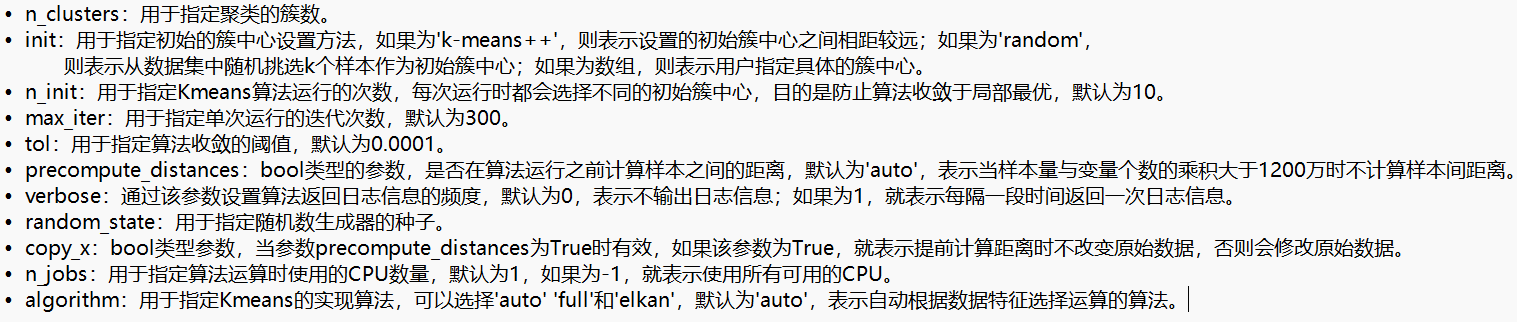

k值的确定方法：

1.簇内离差平方和拐点法

在不同的k值下计算簇内离差平方和，然后通过可视化的方法找到拐点对应的K值

In [1]:
#导入第三方模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#随机生成三组二元正态分布随机数
np.random.seed(1234)
mean1 = [0.5,0.5]
cov1 = [[0.3,0],[0,0.3]]
x1,y1 = np.random.multivariate_normal(mean1,cov1,1000).T

mean2 = [0,8]
cov2 = [[1.5,0],[0,1]]
x2,y2 = np.random.multivariate_normal(mean2,cov2,1000).T

mean3 = [8,4]
cov3 = [[1.5,0],[0,1]]
x3,y3 = np.random.multivariate_normal(mean3,cov3,1000).T

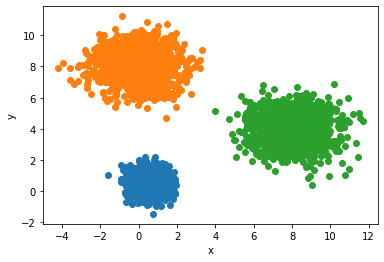

In [3]:
#绘制三组数据的散点图
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

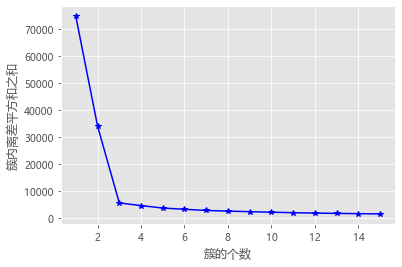

In [4]:
#构建自定义函数用于绘制不同的k值和对应的簇内离差平方和的折线图
def k_SSE(X,clusters):
    #选择连续的K种不同的值
    K = range(1,clusters+1)
    #构建空列表用于存储簇内离差平方和
    TSSE = []
    for k in K:
        #用于存储各个簇内离差平方和
        SSE = []
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        #返回簇标签
        labels = kmeans.labels_
        #返回簇中心
        centers = kmeans.cluster_centers_
        #计算各簇样本的离差平方和，并保存到列表中
        for label in set(labels):
            SSE.append(np.sum((X.loc[labels == label,:] - centers[label,:])**2))
        #计算总的簇内离差平方和
        TSSE.append(np.sum(SSE))
        
    #中文和负号显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    #设置绘图风格
    plt.style.use('ggplot')
    #绘制K的个数与TSSE的关系
    plt.plot(K,TSSE,'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('簇内离差平方和之和')
    plt.show()

#将三组数据集汇总到数据框中
X = pd.DataFrame(np.concatenate([np.array([x1,y1]),np.array([x2,y2]),np.array([x3,y3])],axis=1).T)

k_SSE(X,15)

2.轮廓系数法

3.间隔统计量法

# iris数据集的聚类

In [5]:
iris = pd.read_csv('iris.csv')

In [6]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


花萼的长度，花萼的宽度，花瓣的长度，花瓣的宽度

可以发现没有量纲上的差异，无需做标准化处理

将其分为3类

In [7]:
#提取出用于建模的数据集X
X = iris.drop(labels='Species',axis=1)
#构建Kmeans模型
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
#聚类结果标签
X['cluster'] = kmeans.labels_
#各类频数统计
X.cluster.value_counts()


2    62
1    50
0    38
Name: cluster, dtype: int64

绘制散点图对比原始数据的三类和建模后的三类差异

D:\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


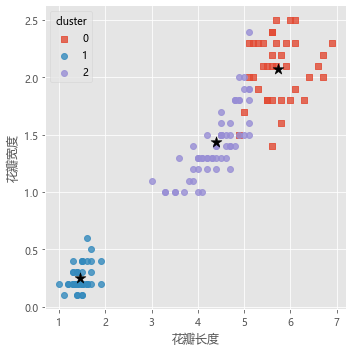

D:\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


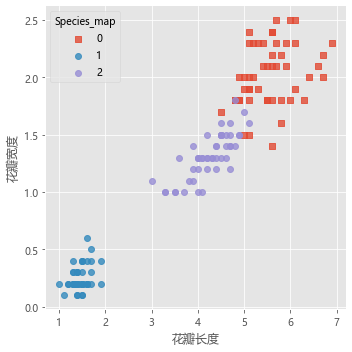

In [8]:
import seaborn as sns

#三个簇的簇中心
centers = kmeans.cluster_centers_
#绘制聚类效果的散点图
sns.lmplot(x = 'Petal_Length',y = 'Petal_Width',hue = 'cluster' , markers = ['s','o','o'],
          data = X,fit_reg = False,scatter_kws = {'alpha':0.8},legend_out = False)
plt.scatter(centers[:,2],centers[:,3],marker = '*',color = 'black',s = 130)
plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')
plt.show()

#增加一个辅助列，将不同的花种映射到0，1，2三种值，目的是方便后面图形的对比
iris['Species_map'] = iris.Species.map({'virginica':0,'setosa':1,'versicolor':2})

#绘制原始数据的三个类别的散点图
sns.lmplot(x = 'Petal_Length',y = 'Petal_Width',hue = 'Species_map',data = iris,markers = ['s','o','o'],
          fit_reg = False,scatter_kws = {'alpha':0.8},legend_out = False)
plt.xlabel("花瓣长度")
plt.ylabel("花瓣宽度")
plt.show()

对比三个簇内样本之间的差异，使用雷达图对四个维度的信息进行展示

In [9]:
#导入第三方模块
import pygal

#调用Radar这个类，并设置雷达图的填充及数据范围
radar_chart = pygal.Radar(fill = True)
#添加雷达图各顶点的名称
radar_chart.x_labels = ['花萼长度',"花萼宽度",'花瓣长度','花瓣宽度']

#绘制三个雷达图区域，代表三个簇中心的指标值
radar_chart.add('C1',centers[0])
radar_chart.add('C2',centers[1])
radar_chart.add('C3',centers[2])

#保存图像
radar_chart.render_to_file('radar_chart.svg')